In [2]:
import pandas as pd
import numpy as np

# data reformating

In [23]:
# import json 
# import csv

In [24]:
# with open('/Users/xiaojin/pretty_ms_tweets.json') as json_file: 
#     data = json.load(json_file) 


In [92]:
# def get_tweet(tweet):
#     twitter_tweet = {}
#     twitter_tweet["tweet_id"] = tweet['tweet_id']
#     twitter_tweet["tweet_url"] = tweet["tweet_url"]
#     twitter_tweet["text"] = tweet["text"]
#     twitter_tweet["text_html"] = tweet["text_html"]
#     twitter_tweet["links"] = tweet["links"] 
#     twitter_tweet["hashtags"] = tweet["hashtags"]
#     twitter_tweet["img_urls"] = tweet["img_urls"]
#     twitter_tweet["video_url"] = tweet["video_url"]
#     twitter_tweet["timestamp"] = tweet["timestamp"] 
#     twitter_tweet["timestamp_epochs"] = tweet["timestamp_epochs"]
#     twitter_tweet["likes"] = tweet["likes"] 
#     twitter_tweet["replies"] = tweet["replies"] 
#     twitter_tweet["retweets"] = tweet["retweets"] 
#     twitter_tweet["username"] = tweet["username"] 
#     twitter_tweet["screen_name"] = tweet["screen_name"] 
#     twitter_tweet["user_id"] = tweet["user_id"] 
#     twitter_tweet["is_reply_to"] = tweet["is_reply_to"] 
#     twitter_tweet["is_replied"] = tweet["is_replied"] 
#     twitter_tweet["reply_to_users"] = tweet["reply_to_users"] 
#     twitter_tweet["parent_tweet_id"] = tweet["parent_tweet_id"] 
  
#     return twitter_tweet

# tweets = []                                      

# for i in range(len(data)):
#     tweets.append(get_tweet(data[i]))

# data_frame = pd.DataFrame(tweets)
# data_frame.to_csv('morgan3.csv', index = False)



# data cleaning

In [3]:
# remove tweets wrote by morgan stanley
import re
data = pd.read_csv('/Users/xiaojin/Desktop/Summer-Comp-master/morgan3.csv')
advisor = []
ad_tweet = []
data = data[~data['text'].isna()]
ad = data[data["screen_name"].str[-2:]==("MS" or "ms")]
advisor = np.unique(ad["screen_name"])
ad_tweet,counts = np.unique(ad["text"].str[:40],return_counts= True)

ad_v2 = [x.screen_name for x in data.itertuples() if x.text[:40] in ad_tweet]
advisor_v2,c = np.unique(ad_v2,return_counts= True)
advisor_v2 = advisor_v2.tolist()

data_ms_cleaned= data[~data['screen_name'].isin(advisor_v2)]
data_ms_cleaned


,tweet_id,tweet_url,text,text_html,links,hashtags,img_urls,video_url,timestamp,timestamp_epochs,likes,replies,retweets,username,screen_name,user_id,is_reply_to,is_replied,reply_to_users,parent_tweet_id
0,1006681451058909184,/delila_cain/status/1006681451058909184,No. No it isn't. Frequency hopping is literall...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],[],NaN,2018-06-12T23:35:35,1528846535,0,1,0,That Chick With Cat Ears,delila_cain,733482557128474624,True,True,"[{'screen_name': 'Johnny_Blaze88', 'user_id': ...",9.993151e+17
1,1006678257222213633,/Johnny_Blaze88/status/1006678257222213633,That’s like saying the person that discovered ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],[],NaN,2018-06-12T23:22:54,1528845774,0,1,0,JB,Johnny_Blaze88,164080489,True,True,"[{'screen_name': 'delila_cain', 'user_id': '73...",9.993151e+17
2,1006677568945381378,/delila_cain/status/1006677568945381378,"Yeah, the thing that makes wifi wifi, the tech...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],[],NaN,2018-06-12T23:20:10,1528845610,0,1,0,That Chick With Cat Ears,delila_cain,733482557128474624,True,True,"[{'screen_name': 'Johnny_Blaze88', 'user_id': ...",9.993151e+17
3,1006676806735482880,/mcosens/status/1006676806735482880,#thisisyourtiime @mcosens,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],['thisisyourtiime'],[],NaN,2018-06-12T23:17:08,1528845428,0,0,0,mark william cosens,mcosens,106433662,True,False,"[{'screen_name': 'JustinRose99', 'user_id': '2...",1.006619e+18
5,1006669999782670336,/Johnny_Blaze88/status/1006669999782670336,"No, I was working. I don’t stare at my phone a...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],[],NaN,2018-06-12T22:50:05,1528843805,0,1,0,JB,Johnny_Blaze88,164080489,True,True,"[{'screen_name': 'delila_cain', 'user_id': '73...",9.993151e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,1209448030056828928,/santoshpatnaik/status/1209448030056828928,@MEAIndia @DrSJaishankar FYI..plz do the needful,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],[],[],NaN,2019-12-24T12:17:35,1577189855,0,0,0,FOREVER YOUNG,santoshpatnaik,52612401,True,False,"[{'screen_name': 'ahmedalifayyaz', 'user_id': ...",1.209435e+18
10216,1209447040977162240,/10thState/status/1209447040977162240,"You can reach out to Tana, they’re the one alw...","<p class=""TweetTextSize js-tweet-text tweet-te...",['https://www.tana.org'],[],[],NaN,2019-12-24T12:13:39,1577189619,1,0,0,KB,10thState,131619174,True,False,"[{'screen_name': 'ahmedalifayyaz', 'user_id': ...",1.209435e+18
10217,1209443060813193219,/ahmedalifayyaz/status/1209443060813193219,Hope a quick help to sister of the deceased #K...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://twitter.com/ahmedalifayyaz/status/12...,['Kashmiri'],[],NaN,2019-12-24T11:57:50,1577188670,13,3,10,Ahmed Ali Fayyaz,ahmedalifayyaz,71567486,False,True,[],NaN
10218,1209442567819071490,/MarshallLawTeam/status/1209442567819071490,#Stock #PublicNotice on Argentina\n@BNYMellonW...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['https://twitter.com/MarshallLawTeam/status/1...,"['Stock', 'PublicNotice']",[],NaN,2019-12-24T11:55:53,1577188553,0,0,0,Marshall Law,MarshallLawTeam,708119064938483712,False,False,[],NaN


In [4]:
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiaojin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:

# use TweetTokenizer to tokenise a Tweet Text
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['text']:
        text += str(t)
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(data_ms_cleaned)
print(len(tokens))
print(tokens[:20])
#import nltk
#nltk.download('stopwords')
# remove stop words and other noise(links and special characters) to get clear tokens
from nltk.corpus import stopwords
import string
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation
def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 
                 and (t[0].isalpha())]
                
    
    return tokens_cl
tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

# top 10 mentions
from nltk import FreqDist
mentions = [t for t in tokens if t.startswith('@')]
mentions_fd = FreqDist(mentions).most_common(10)
print(mentions_fd)
# top 10 hashtags
hashtags = [t for t in tokens if (t.startswith('#') and len(t) != 1)]
hashtags_fd = FreqDist(hashtags).most_common(10)
print(hashtags_fd)

# extract the mean of lenghts:
import numpy as np
mean = np.mean([len(str(i)) for i in data_ms_cleaned.text])
# The lenght's average in tweets. This needs to be fixed
print("The lenght's average in tweets: %.2f%%" % mean)

# extract the tweet with more likes and more RTs:
fav_max = np.max(data_ms_cleaned['likes'])
rt_max  = np.max(data_ms_cleaned['retweets'])

fav = data_ms_cleaned[data_ms_cleaned.likes == fav_max].index[0]
rt  = data_ms_cleaned[data_ms_cleaned.retweets == rt_max].index[0]
# Max likes:
print("The tweet with more likes is: \n{}".format(data_ms_cleaned['text'][fav]))
print("Number of likes: {}".format(fav_max))
print()
# Max RTs:
print("The tweet with more retweets is: \n{}".format(data_ms_cleaned['text'][rt]))
print("Number of retweets: {}".format(rt_max))




211571
['no', '.', 'no', 'it', "isn't", '.', 'frequency', 'hopping', 'is', 'literally', 'how', 'wifi', 'works.that', '’', 's', 'like', 'saying', 'the', 'person', 'that']
82125
['frequency', 'hopping', 'literally', 'wifi', 'works.that', 'like', 'saying', 'person', 'discovered', 'electricity', 'also', 'discovered', 'wifi', 'correct', 'far', 'back', 'would', 'like', 'yeah', 'thing']
[('@morganstanley', 3658), ('@goldmansachs', 362), ('@jpmorgan', 292), ('@citi', 240), ('@bankofamerica', 217), ('@wellsfargo', 151), ('@realdonaldtrump', 129), ('@merrilllynch', 125), ('@blackrock', 100), ('@business', 93)]
[('#morganstanley', 1014), ('#goldmansachs', 120), ('#news', 112), ('#stockmarket', 91), ('#investing', 83), ('#bitcoin', 82), ('#wallstreet', 81), ('#alert', 80), ('#fintech', 74), ('#trading', 67)]
The lenght's average in tweets: 172.43%
The tweet with more likes is: 
FM @NicolaSturgeon visited @MorganStanley in New York to discuss current and future collaborative projects at their Centr

In [48]:
# import nltk
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xiaojin/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [94]:
#tag each token
tagged = nltk.pos_tag(tokens_cl)

In [58]:
# extract noun from tokens
l=[]
for i in tagged:
    if i[1]=='NN':
        l.append(i[0])    

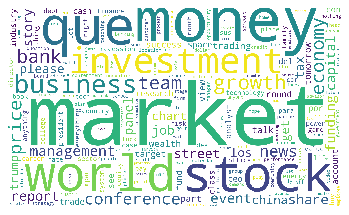

In [62]:
#aaply word cloud

from pandas import Series, DataFrame
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
listnew1 = []
for i in l:

        
    listnew1.extend(i.lower().split(" "))
wordcloud = WordCloud(
        collocations=False,
        stopwords=['twitter','morgan','stanley','com','morganstanley','pic','day','status','help','way','change'
                   ,'work','week','support','new','everyone','company',"i'm","can't",'yesterday'],
        background_color="white", #set the background to white
        width=2500,              #set the width
        height=1500,              #set the height
        margin=10               #set the margin
        ).generate('\n'.join(listnew1))
# show the graph
plt.imshow(wordcloud)
plt.axis("off")
# show the picture
plt.show()
# save the picture
# wordcloud.to_file('./wordcloud.png')  

# sentment analysis

In [69]:
# pip install vaderSentiment

In [71]:
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/xiaojin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [72]:

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


full_text = ''
for txt in data_ms_cleaned['text']:
    full_text = full_text+txt+' '

analyzer = SentimentIntensityAnalyzer()
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = sent_detector.tokenize(full_text.strip())

In [80]:
def get_sentiment(topic):
    word = topic
    sentence_count = 0
    running_total = 0
    for sentence in sentences:

        sentence = sentence.lower()
        word = word.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return(0) 
    return (running_total/sentence_count)


In [74]:
ls=['financial advisor', 'robo advisor', 
'investment', 
'financial planning', 'customer service', 'online account', 'mobile app design',
'advisory fee', 'trading transaction fee']


In [83]:
d={}
for i in ls:
    d[i]=[get_sentiment(i)]
d

{'financial advisor': [0.33904761904761904],
 'robo advisor': [0],
 'investment': [0.2291600732600733],
 'financial planning': [0.9189],
 'customer service': [0.09756000000000001],
 'online account': [-0.18845000000000003],
 'mobile app design': [0],
 'advisory fee': [0],
 'trading transaction fee': [0]}

In [91]:
df=pd.DataFrame(d,index = ['sentiment score'])

In [93]:
df.T

,sentiment score
financial advisor,0.339048
robo advisor,0.000000
investment,0.229160
financial planning,0.918900
customer service,0.097560
online account,-0.188450
mobile app design,0.000000
advisory fee,0.000000
trading transaction fee,0.000000
